In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#DATA

In [98]:
df = pd.read_csv('https://raw.githubusercontent.com/ShubhamAgr09/Training-Datasets/main/BostonHousing_train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       400 non-null    int64  
 1   CRIM     400 non-null    float64
 2   ZN       400 non-null    float64
 3   INDUS    400 non-null    float64
 4   CHAS     400 non-null    int64  
 5   NOX      400 non-null    float64
 6   RM       400 non-null    float64
 7   AGE      400 non-null    float64
 8   DIS      400 non-null    float64
 9   RAD      400 non-null    int64  
 10  TAX      400 non-null    float64
 11  PTRATIO  400 non-null    float64
 12  B        400 non-null    float64
 13  LSTAT    400 non-null    float64
 14  MEDV     400 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 47.0 KB


#EDA

Detecting Outliers with the help of Boxplot

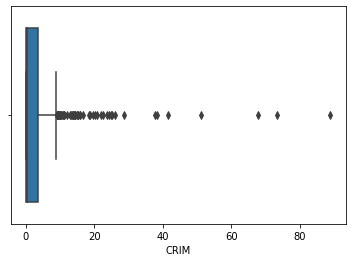

In [42]:
sns.boxplot(x=df.CRIM)

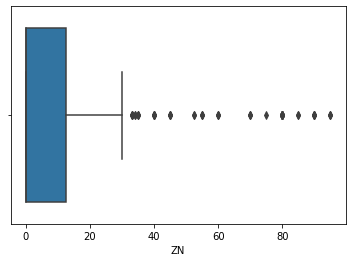

In [43]:
sns.boxplot(x=df.ZN)

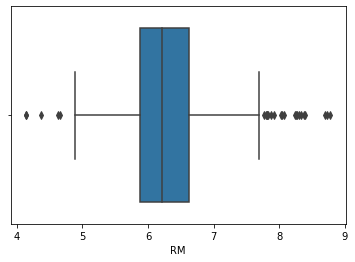

In [44]:
sns.boxplot(x=df.RM)

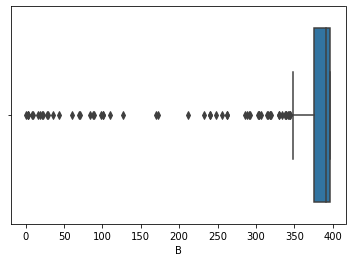

In [45]:
sns.boxplot(x=df.B)

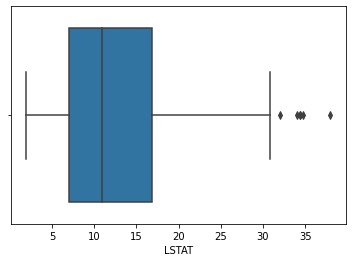

In [46]:
sns.boxplot(x=df.LSTAT)

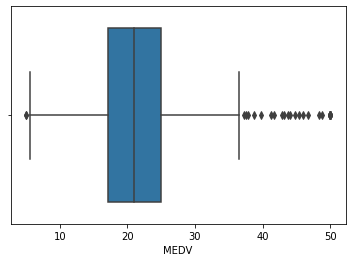

In [47]:
sns.boxplot(x=df.MEDV)

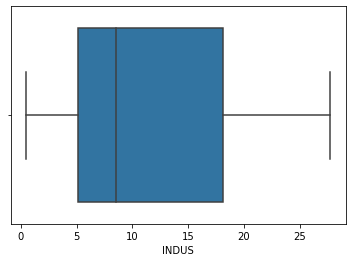

In [48]:
sns.boxplot(x=df.INDUS)

In [49]:
# sns.boxplot(x=df.CHAS)
df.CHAS.value_counts()

0    371
1     29
Name: CHAS, dtype: int64

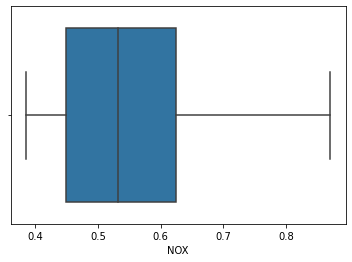

In [50]:
sns.boxplot(x=df.NOX)

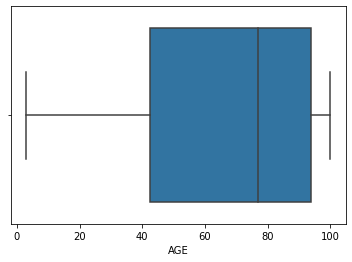

In [51]:
sns.boxplot(x=df.AGE)

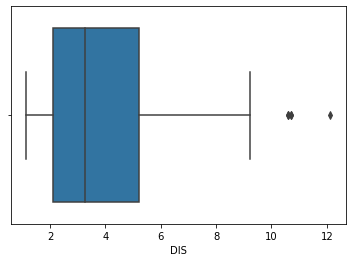

In [52]:
sns.boxplot(x=df.DIS)

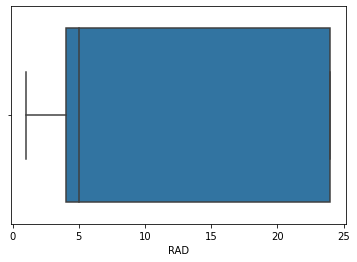

In [53]:
sns.boxplot(x=df.RAD)

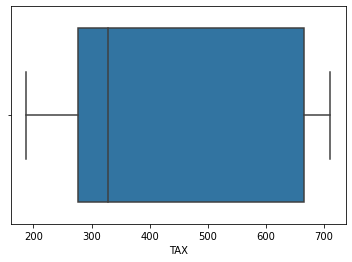

In [54]:
sns.boxplot(x=df.TAX)

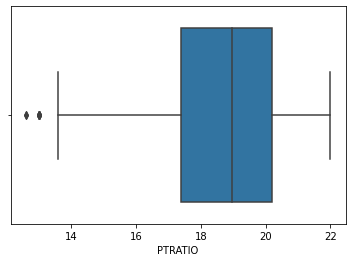

In [55]:
sns.boxplot(x=df.PTRATIO)

Removing Outliers by Capping

In [56]:
# sns.pairplot(df)
# plt.show()

#Splitting Data

In [57]:
df.columns

Index(['ID', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [58]:
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT']].values
y = df.iloc[:,-1].values 

**SPLITTING**

In [59]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
#25

**Feature Scaling**

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Model Building

#Neural Network

In [61]:
from tensorflow import keras
from keras import Sequential, layers, models
from keras.layers import Flatten, Dense
ann = Sequential()
# model.add(Flatten(input_shape=(28,28))
ann.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
ann.add(Dense(64, activation='relu'))
ann.add(Dense(1, activation='linear'))

ann.compile(optimizer='sgd', loss='mse', metrics='accuracy')
ann.summary()
history = ann.fit(X_train,y_train,validation_split=0.1,epochs=60)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               1792      
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________
Epoch 1/60
9/9 [==============================] - 0s 22ms/step - loss: 368.0343 - accuracy: 0.0000e+00 - val_loss: 427.8088 - val_accuracy: 0.0000e+00
Epoch 2/60
9/9 [==============================] - 0s 4ms/step - loss: 256.7396 - accuracy: 0.0000e+00 - val_loss: 80.3645 - val_accuracy: 0.0000e+00
Epoch 3/60
9/9

##1. Linear Regression

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

steps = [
          ('poly', PolynomialFeatures(degree=2)),
          ('model', LinearRegression(fit_intercept=True))
        ]

lin_regressor = Pipeline(steps)
lin_regressor.fit(X_train, y_train)

#Applying Cross validation on train data
cv_line_regressor = cross_val_score(estimator = lin_regressor, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Test set results
y_pred_linear_train = lin_regressor.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = lin_regressor.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE on the Test set results
mse_lin_regressor = mean_squared_error(y_test, y_pred_linear_test)
print('CV: ', cv_line_regressor.mean())
print('R2_score (train): {}  ------------> {}%'.format(r2_score_linear_train,r2_score_linear_train*100))
print('R2_score (test) : {}  ------------> {}%'.format(r2_score_linear_test,r2_score_linear_test*100))
print("RMSE: ", mse_lin_regressor)

CV:  0.7648903620634623
R2_score (train): 0.9391652139744588  ------------> 93.91652139744589%
R2_score (test) : 0.8490890668675388  ------------> 84.90890668675388%
RMSE:  12.581348053735088


##2. Ridge Regression

In [63]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

steps = [
          ('poly', PolynomialFeatures(degree=2)),
          ('model', Ridge(alpha=.02, fit_intercept=True))
        ]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)

#Applying Cross validation on train data
cv_ridge = cross_val_score(estimator = ridge_pipe, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Test set results
y_pred_ridge_train = ridge_pipe.predict(X_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting R2 Score the Test set results
y_pred_ridge_test = ridge_pipe.predict(X_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting RMSE the Test set results
mse_ridge = mean_squared_error(y_test, y_pred_ridge_test)
print('CV: ', cv_ridge.mean())
print('R2_score (train): {}  ------------> {}%'.format(r2_score_ridge_train,r2_score_ridge_train*100))
print('R2_score (test) : {}  ------------> {}%'.format(r2_score_ridge_test,r2_score_ridge_test*100))
print("RMSE: ", mse_ridge)

CV:  0.7775352258520825
R2_score (train): 0.9389978400436388  ------------> 93.89978400436388%
R2_score (test) : 0.8474231880218261  ------------> 84.74231880218261%
RMSE:  12.72023130850145


##3. Lasso Regression

In [64]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

steps = [
          ('poly', PolynomialFeatures(degree=2)),
          ('model', Lasso(alpha=0.013, fit_intercept=True, max_iter=3000))
        ]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(X_train, y_train)

# Predicting Cross Validation Score
cv_lasso = cross_val_score(estimator = lasso_pipe, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Test set results
y_pred_lasso_train = lasso_pipe.predict(X_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score the Test set results
y_pred_lasso_test = lasso_pipe.predict(X_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting RMSE the Test set results
mse_lasso = mean_squared_error(y_test, y_pred_lasso_test)
print('CV: ', cv_lasso.mean())
print('R2_score (train): {}  ------------> {}%'.format(r2_score_lasso_train,r2_score_lasso_train*100))
print('R2_score (test) : {}  ------------> {}%'.format(r2_score_lasso_test,r2_score_lasso_test*100))
print("RMSE: ", mse_lasso)

CV:  0.819351838345872
R2_score (train): 0.9308197964162684  ------------> 93.08197964162684%
R2_score (test) : 0.8370695855981063  ------------> 83.70695855981063%
RMSE:  13.583404525967927


##Gradient Boost Regressing

In [65]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

predicted = gbr.predict(X_test)
expected = y_test
cv_gbr = cross_val_score(estimator = gbr, X = X_train, y = y_train, cv = 10)
y_pred_gbr_train = gbr.predict(X_train)
r2_score_gbr_train = r2_score(y_train, y_pred_gbr_train)

# Predicting R2 Score the Test set results
y_pred_gbr_test = gbr.predict(X_test)
r2_score_gbr_test = r2_score(y_test, y_pred_gbr_test)

# Predicting RMSE the Test set results
mse_gbr = mean_squared_error(y_test, y_pred_gbr_test)
print('CV: ', cv_gbr.mean())
print('R2_score (train): ', r2_score_gbr_train)
print('R2_score (test): ', r2_score_gbr_test)
print("RMSE: ", mse_gbr)
gbr.score(X_test,y_test)

CV:  0.8393644119465262
R2_score (train):  0.9860005810715711
R2_score (test):  0.8475813754911088
RMSE:  12.707043320279032


0.8475813754911088

## 4. Decision Tree

In [66]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
regressor_dt = DecisionTreeRegressor(max_depth=4, random_state = 0)
regressor_dt.fit(X_train, y_train)


# Predicting Cross Validation Score
cv_dt = cross_val_score(estimator = regressor_dt, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_dt_train = regressor_dt.predict(X_train)
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

# Predicting R2 Score the Test set results
y_pred_dt_test = regressor_dt.predict(X_test)
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

# Predicting RMSE the Test set results
mse_dt = mean_squared_error(y_test, y_pred_dt_test)
print('CV: ', cv_dt.mean())
print('R2_score (train): ', r2_score_dt_train)
print('R2_score (test): ', r2_score_dt_test)
print("RMSE: ", mse_dt)

CV:  0.7464347305570177
R2_score (train):  0.8949804075664611
R2_score (test):  0.7052403498395083
RMSE:  24.573923664041256


##5. Random Forest Regression

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf_regressor = RandomForestRegressor(n_estimators = 500, random_state = 0)
rf_regressor.fit(X_train, y_train)

cv_rf = cross_val_score(estimator = rf_regressor, X = X_train, y = y_train, cv = 10)

y_pred_rf_train = rf_regressor.predict(X_train)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

y_pred_rf_test = rf_regressor.predict(X_test)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

# Predicting RMSE the Test set results
mse_rf = mean_squared_error(y_test, y_pred_rf_test)
print('CV: ', cv_rf.mean())
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (test): ', r2_score_rf_test)
print("RMSE: ", mse_rf)

CV:  0.8230648744661891
R2_score (train):  0.9797895970448821
R2_score (test):  0.8597148400865418
RMSE:  11.695484131000004


##6. XGBoost Regression

In [68]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np

xgb_regressor = xgb.XGBRegressor(learning_rate =.11, n_estimators=100, verbosity = 0, random_state=0) # initialise the model
xgb_regressor.fit(X_train,y_train) #train the model
xgb_regressor.score(X_test, y_test) # scoring the model - r2 squared
xgbr_cross_val_score = np.mean(cross_val_score(xgb_regressor, X_train, y_train, cv=10))
print("Learning rate : ", .11)

y_pred_xgbr_train = xgb_regressor.predict(X_train)
r2_score_xgbr_train = r2_score(y_train, y_pred_xgbr_train)

y_pred_xgbr_test = xgb_regressor.predict(X_test)
r2_score_xgbr_test = r2_score(y_test, y_pred_xgbr_test)

mse_xgbr = mean_squared_error(y_test, y_pred_xgbr_test)
print('CV: ', xgbr_cross_val_score)
print('R2_score (train): ', r2_score_xgbr_train)
print('R2_score (test): ', r2_score_xgbr_test)
print("RMSE: ", mse_xgbr)

Learning rate :  0.11
CV:  0.8086925466596337
R2_score (train):  0.9824674972813897
R2_score (test):  0.8037485108293709
RMSE:  16.361361235188046


#Measuring Errors

In [69]:
models = [('Linear Regression', mse_lin_regressor, r2_score_linear_train, r2_score_linear_test, cv_line_regressor.mean()),
          ('Ridge Regression', mse_ridge, r2_score_ridge_train, r2_score_ridge_test, cv_ridge.mean()),
          ('Lasso Regression', mse_lasso, r2_score_lasso_train, r2_score_lasso_test, cv_lasso.mean()),
          ('Decision Tree Regression', mse_dt, r2_score_dt_train, r2_score_dt_test, cv_dt.mean()),
          ('Random Forest Regression', mse_rf, r2_score_rf_train, r2_score_rf_test, cv_rf.mean()),
          ('GB Regression', mse_gbr, r2_score_gbr_train, r2_score_gbr_test, cv_gbr.mean()),
          ('XGB Regression', mse_xgbr, r2_score_xgbr_train, r2_score_xgbr_test, xgbr_cross_val_score)
         ]
Table = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
Table

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,12.581348,0.939165,0.849089,0.764890
1,Ridge Regression,12.720231,0.938998,0.847423,0.777535
2,Lasso Regression,13.583405,0.930820,0.837070,0.819352
3,Decision Tree Regression,24.573924,0.894980,0.705240,0.746435
4,Random Forest Regression,11.695484,0.979790,0.859715,0.823065
5,GB Regression,12.707043,0.986001,0.847581,0.839364
6,XGB Regression,16.361361,0.982467,0.803749,0.808693


#Importing Test Data To Predict Target by Best Model

In [92]:
df2 = pd.read_csv('https://raw.githubusercontent.com/ShubhamAgr09/Training-Datasets/main/BostonHousing_test.csv')
Xn = df2.iloc[:,1:].values
# Xn = scaler.transform(Xn)

In [93]:
y_pred_rf_test = rf_regressor.predict(Xn)
y_pred_rf_test.shape

(105,)

In [94]:
df2['Predicted_Price'] = y_pred_rf_test
df2

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Predicted_Price
0,0,0.10612,30.0,4.93,0,0.428,6.095,65.1,6.3361,6,300.0,16.6,394.62,12.40,26.0282
1,1,0.34109,0.0,7.38,0,0.493,6.415,40.1,4.7211,5,287.0,19.6,396.90,6.12,25.5182
2,2,12.24720,0.0,18.10,0,0.584,5.837,59.7,1.9976,24,666.0,20.2,24.65,15.69,24.8804
3,3,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45,25.5812
4,4,1.80028,0.0,19.58,0,0.605,5.877,79.2,2.4259,5,403.0,14.7,227.61,12.14,25.1398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,100,0.19073,22.0,5.86,0,0.431,6.718,17.5,7.8265,7,330.0,19.1,393.74,6.56,25.7704
101,101,6.96215,0.0,18.10,0,0.700,5.713,97.0,1.9265,24,666.0,20.2,394.43,17.11,24.8804
102,102,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4,243.0,16.8,396.90,5.28,26.0302
103,103,0.10469,40.0,6.41,1,0.447,7.267,49.0,4.7872,4,254.0,17.6,389.25,6.05,26.0282
